In [45]:
import geopandas as gpd
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

bp = Path('/Users/sho108/Desktop/r/work/sho108/neuralhydrology_workflow')
output_directory = bp / 'basins/twofoldsplit'

aus_shpfile = Path('/Users/sho108/Desktop/z/Data/CAMELS_AUS/02_location_boundary_area/shp/bonus data/Australia_boundaries.shp')
shpfile = Path('/Users/sho108/Desktop/z/Data/CAMELS_AUS/02_location_boundary_area/shp/CAMELS_AUS_Boundaries_adopted.shp')

df_list = []
for fold in output_directory.glob('fold_*_test.*'):
    df = pd.read_csv(fold, header=None, index_col=0)
    df['fold'] = int(fold.name.split('_')[1])
    df_list.append(df)

df = pd.concat(df_list)

kwargs = dict()
gdf = gpd.read_file(shpfile)
aus_gdf = gpd.read_file(aus_shpfile)
gdf_merged = pd.merge(gdf, df, left_on='CatchID', right_index=True)

# Create 'outputs' folder if not available
output_folder = Path('outputs')
output_folder.mkdir(parents=True, exist_ok=True)

fig, ax = plt.subplots(figsize=(15, 15))
gdf_merged.plot(column='fold', cmap='tab10', vmin=-1, vmax=1, edgecolor='k', linewidth=0.3, ax=ax)
aus_gdf.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=0.2)
plt.xlim([111.5, 154])
plt.ylim([-44, -10])
plt.gca().set_aspect('equal')

output_file = output_folder / 'split_map.jpg'
plt.savefig(output_file, dpi=450)


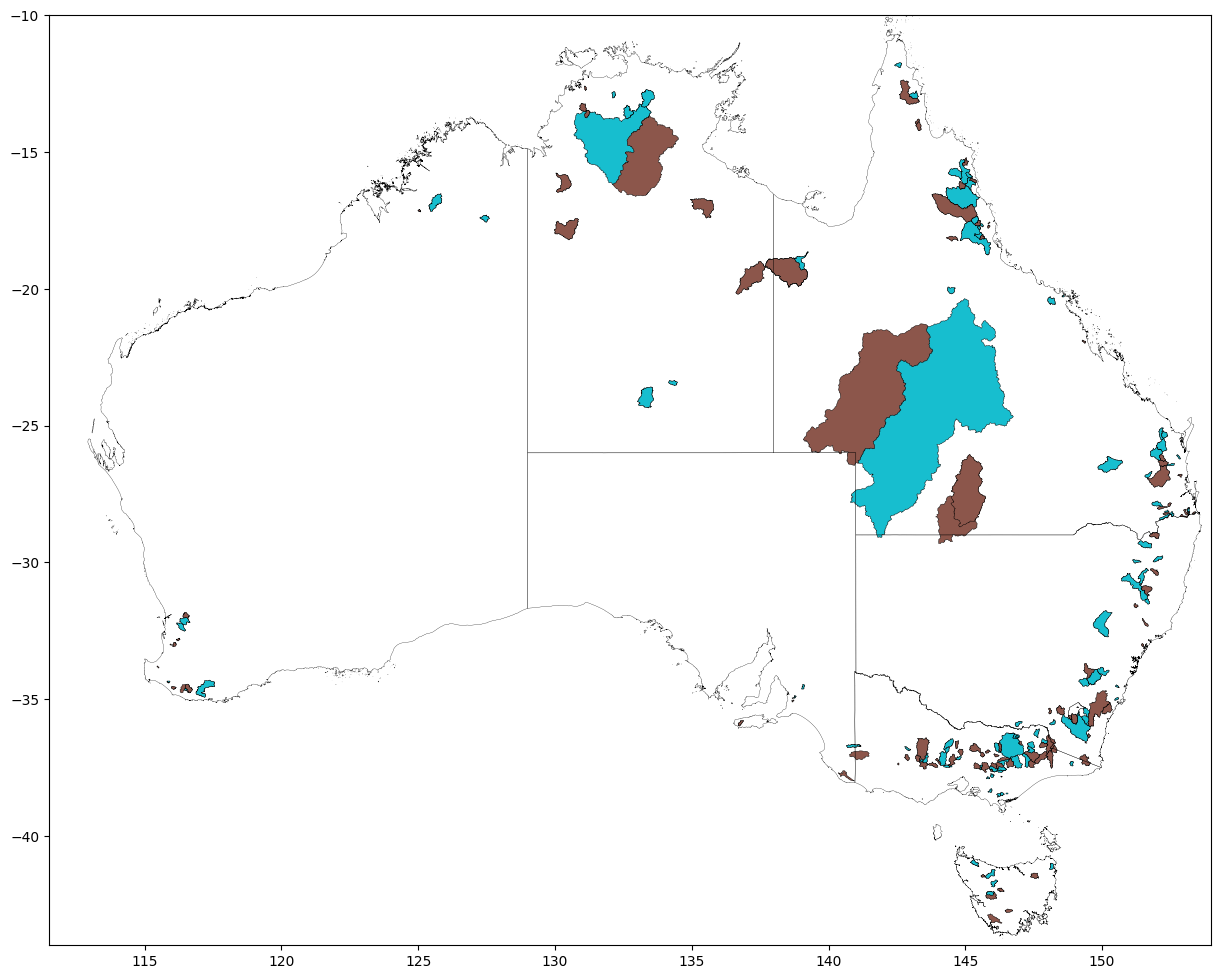